# Producer

Application Package to produce a Zarr store with detected water bodies described as a STAC Collection including the STAC Datacube extension.


In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join(".."))
sys.path.insert(0, module_path)

from helpers import WorkflowViewer
import cwl_loader
cwl_loader.logger.remove()
cwl_loader.logger.add(sys.stderr, level="INFO")

1

In [2]:
version = "0.3.0"
wf = WorkflowViewer.from_file(f"https://github.com/eoap/zarr-cloud-native-format/releases/download/{version}/app-water-bodies.{version}.cwl", "water-bodies")

## Inputs

In [3]:
wf.display_inputs()

| Id | Type | Label | Doc |
| --- | --- | --- | --- |
| `stac_api_endpoint` | `https://raw.githubusercontent.com/eoap/schemas/main/experimental/api-endpoint.yaml#APIEndpoint` | STAC API endpoint | STAC API endpoint |
| `search_request` | `https://raw.githubusercontent.com/eoap/schemas/main/experimental/discovery.yaml#STACSearchSettings` | STAC search request | STAC search request |
| `bands` | `string[]` | bands used for the NDWI | bands used for the NDWI |


## Steps

In [4]:
wf.display_steps()

| Id | Runs | Label | Doc |
| --- | --- | --- | --- |
| `discovery` | `#stac-client` | STAC API discovery | Discover STAC items from a STAC API endpoint based on a search request |
| `convert_search` | `#convert-search` | Convert Search | Convert Search results to get the item self hrefs and the area of interest |
| `water_bodies` | `#detect_water_body` | Water bodies detection | Water bodies detection based on NDWI and otsu threshold applied to each STAC item (sub-workflow) |
| `stac` | `#stac` | Create a STAC catalog with COG outputs | Create a STAC catalog with the detected water bodies COG outputs |
| `stac_zarr` | `#stac-zarr` | Create a STAC Catalog for the Zarr store | Create a STAC Catalog for the Zarr store from the STAC catalog with COG outputs |


## Outputs

In [5]:
wf.display_outputs()


| Id | Type | Label | Doc |
| --- | --- | --- | --- |
| `zarr_stac_catalog` | `Directory` | None | None |
| `stac_catalog` | `Directory` | None | None |


## Component diagram

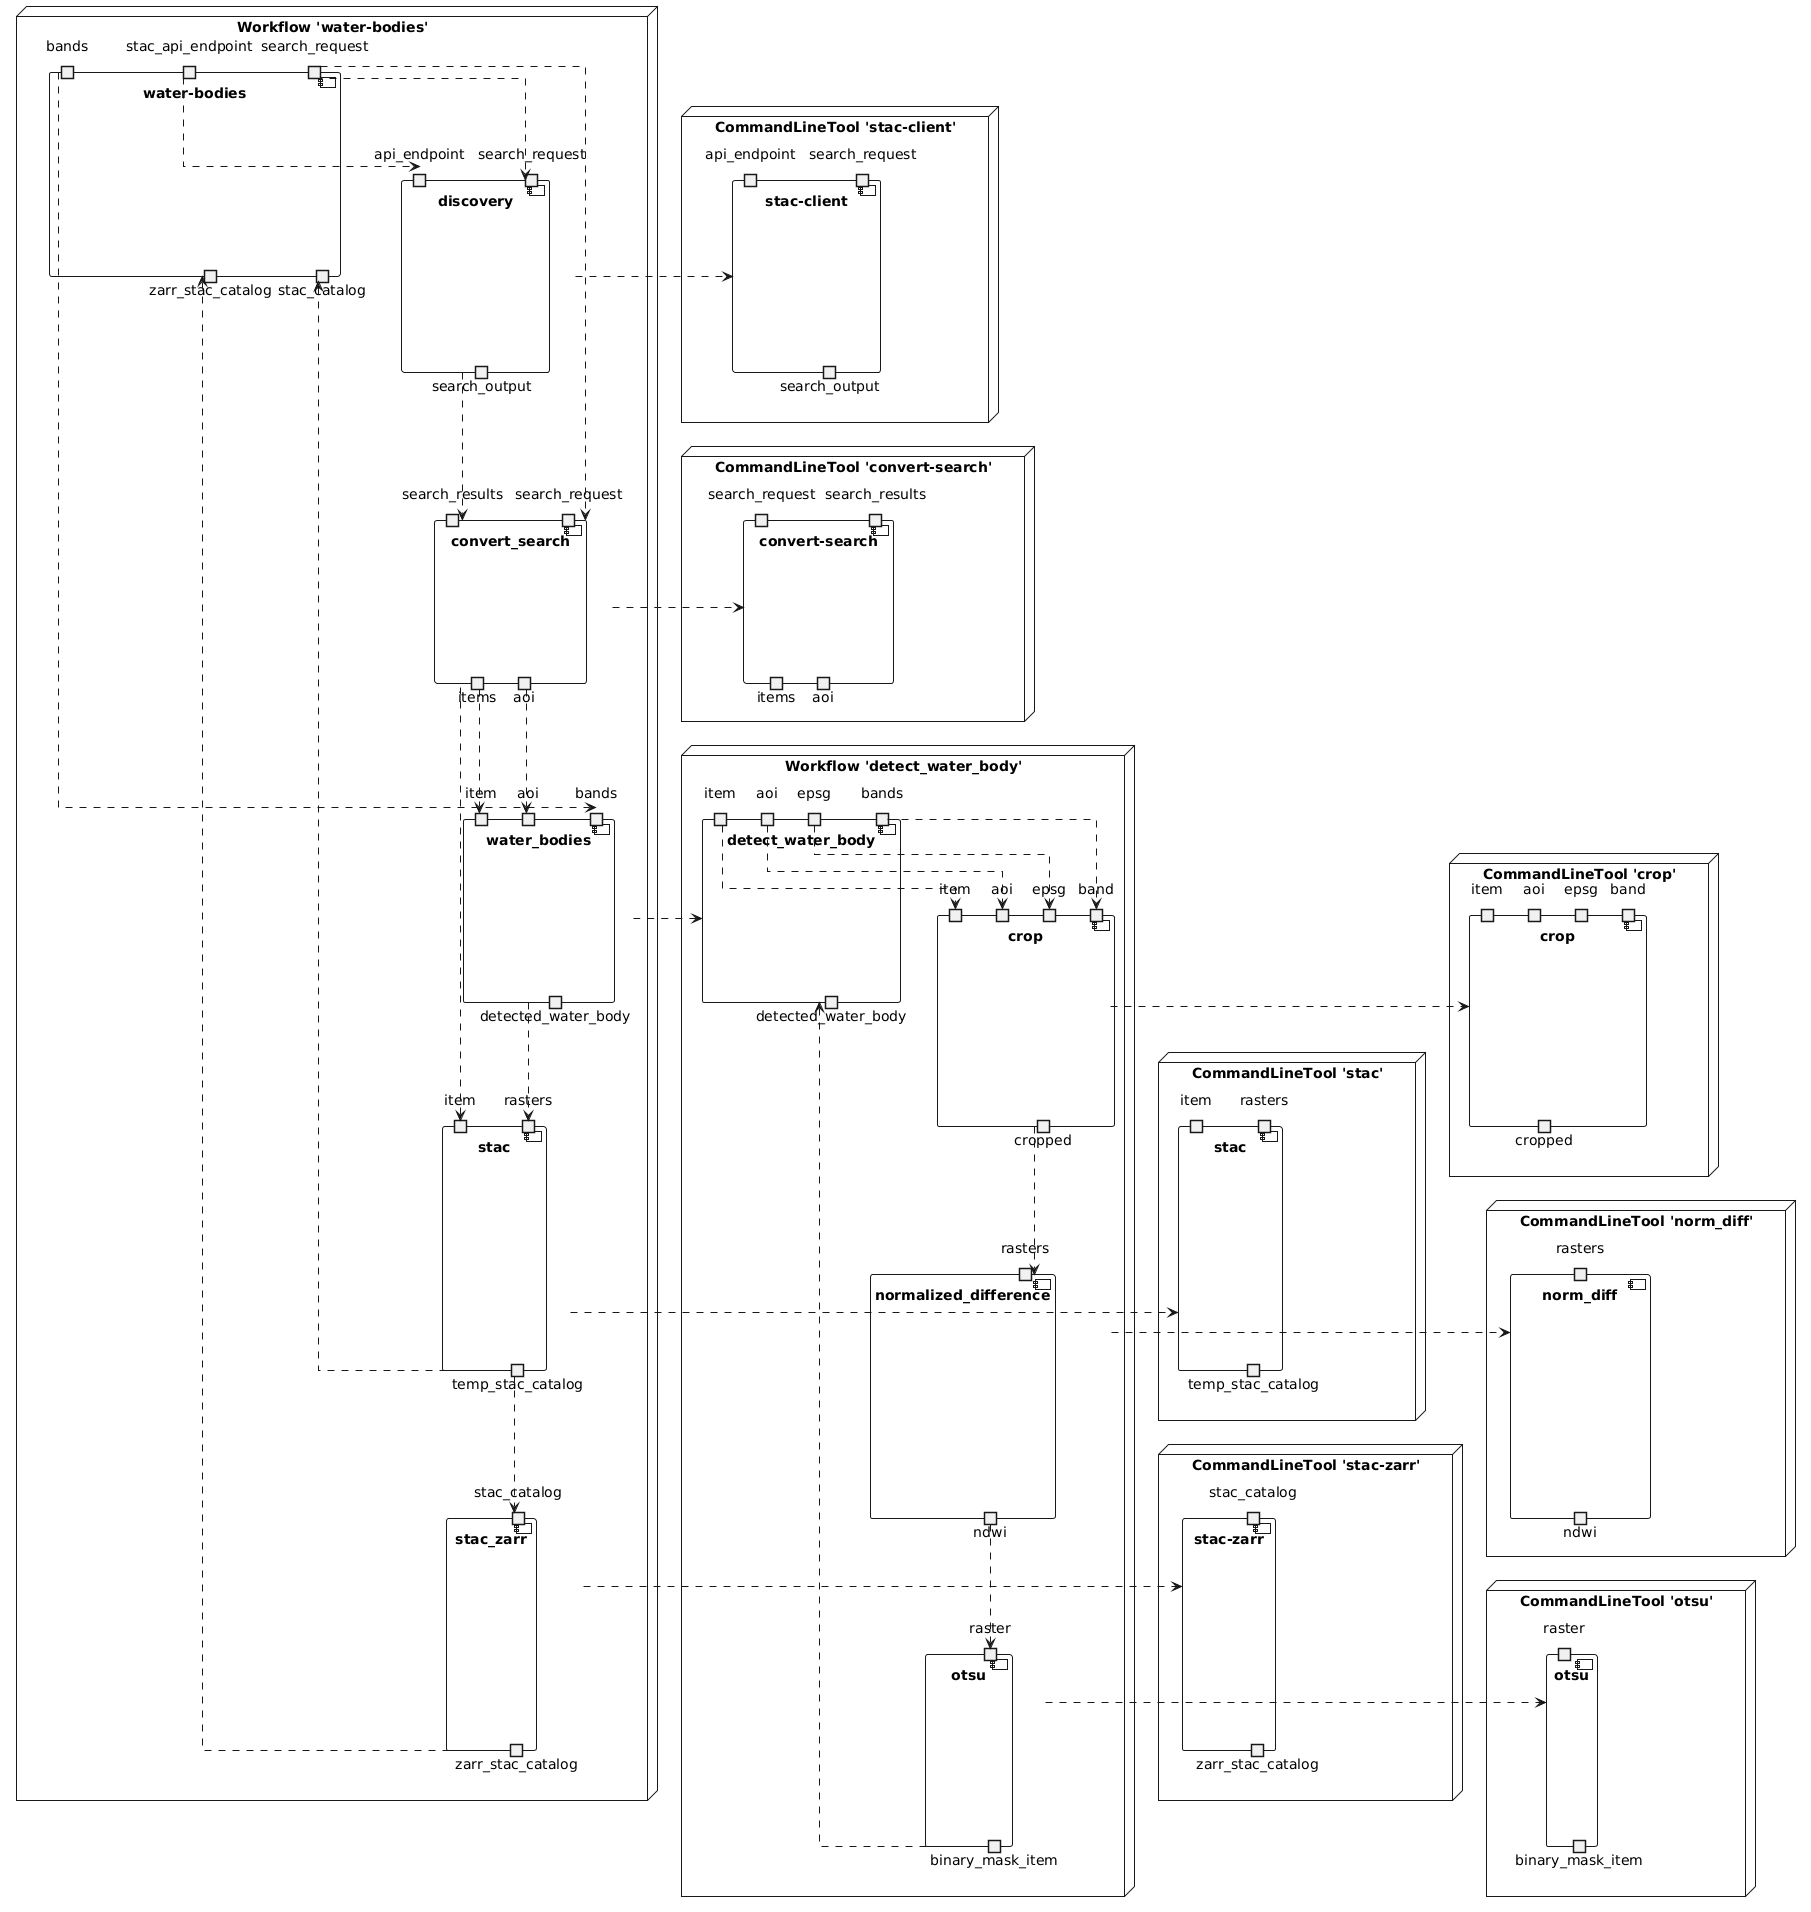

In [6]:
wf.display_components_diagram()

## Class diagram

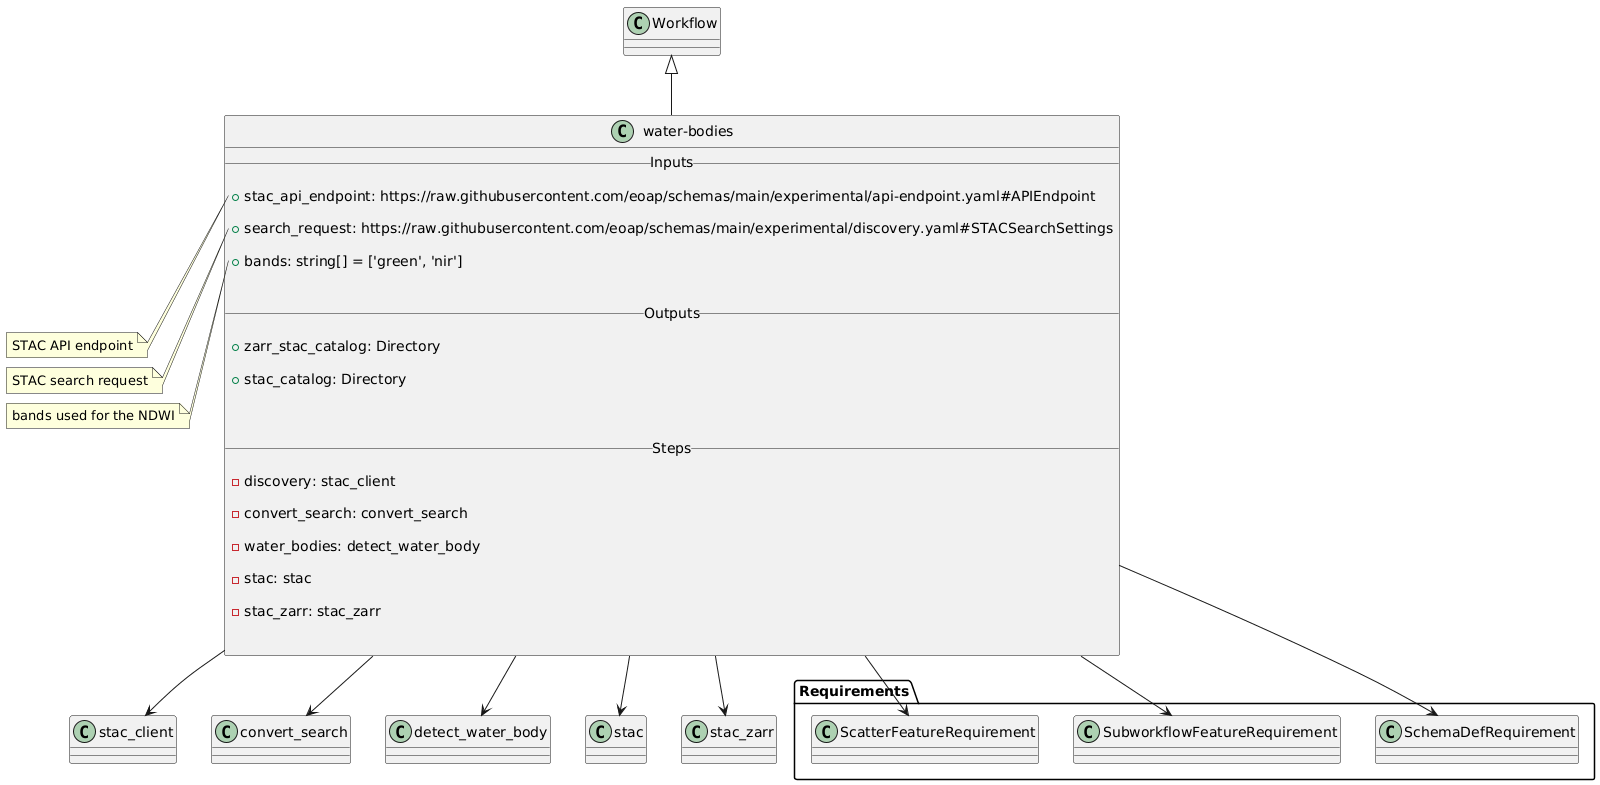

In [7]:
wf.display_class_diagram()